In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline

In [88]:
url ='https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/Social_Network_Ads.csv'
df = pd.read_csv(url)

In [89]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:>

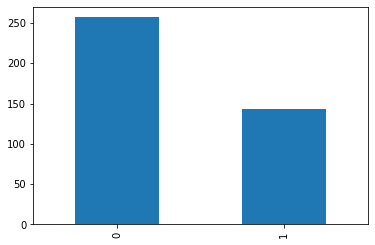

In [90]:
df['Purchased'].value_counts().plot(kind='bar')

In [91]:
ord = OrdinalEncoder()
df[['Gender']]= ord.fit_transform(df[['Gender']].values)

In [92]:
X = df[['Age','EstimatedSalary','Gender']]
y = df['Purchased']

xtrain, xtest, ytrain, ytest = train_test_split(X.values, y.values, 
                                                test_size=.25, random_state=0) 

In [93]:
model = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=5))
model.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregressioncv', LogisticRegressionCV(cv=5))])

In [94]:
ypred = model.predict(xtest)
print('confusion matrix')
print(confusion_matrix(ytest, ypred))

confusion matrix
[[65  3]
 [ 6 26]]


In [95]:
print('classification report')
print(classification_report(ytest, ypred))

classification report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.90      0.81      0.85        32

    accuracy                           0.91       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100



In [96]:
# user input
gender = input("enter gender:")
age = int(input("enter Age:"))
salary = int(input('salary: '))
gender = ord.transform([[gender]])[0][0]
inp = np.array([age, salary, gender])
print(model.predict([inp]))

[1]
